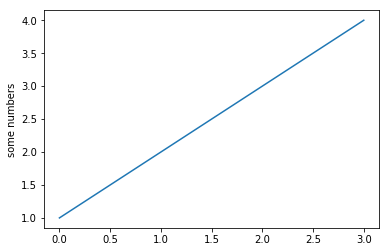

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()


import cv2
import numpy as np
import os 


In [63]:
	Obstacles = [225, 13, 0]
	path_robot = [149, 255, 0]
	background = [255, 255, 255]
label_colours = np.array([Obstacles, path_robot, background, background])

label_colours.shape[0]

4

In [3]:
#Methods to sort as human expect
import re

def tryint(s):
    try:
        return int(s)
    except:
        return s
    
def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def sort_nicely(l):
    """ Sort the given list in the way that humans expect.
    """
    l.sort(key=alphanum_key)
    


# ----------------------------------------------------------------

(333, 250, 3)

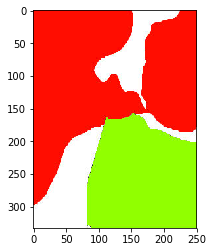

In [65]:
im_name = "Road_in_niigata_L.jpg"

im = cv2.imread(im_name)

plt.imshow(im[:,:,::-1])

im.shape

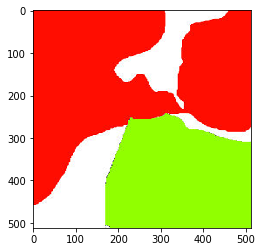

In [66]:
## Resize test

img_cols = img_rows = 512

resized = cv2.resize(im ,(img_cols, img_rows), interpolation =  cv2.INTER_CUBIC)

plt.imshow(resized[:,:,::-1])

# Replace labels images names to have the same original image's name

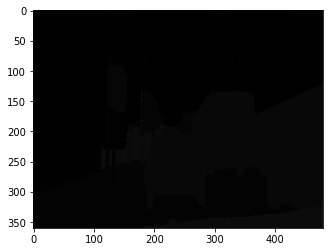

In [50]:
%matplotlib inline

im_label = cv2.imread("0001TP_006690.png")

plt.imshow(im_label[:,:,::-1])

In [51]:
# Check image label form

print("Shape" , im_label.shape)
print("min" , im_label.min())
print("max" , im_label.max())
print("mean" , im_label.mean())

#Es una imagen cuyos valores van de 0 a 11, 
#cada valor represeta una clase, y todos los pixeles de la imagen tienen el valor de una de las clases

('Shape', (360, 480, 3))
('min', 0)
('max', 11)
('mean', 3.5444386574074076)


In [52]:
im_label[-1,-1,:]

array([11, 11, 11], dtype=uint8)

In [55]:
train_path = "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train"
train_labels_path = "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train_labels_not"

all_names_train = os.listdir(train_path)

sort_nicely(all_names_train)  


In [ ]:
all_names_train_labels = os.listdir(train_labels_path)

sort_nicely(all_names_train_labels)  


In [ ]:
#Change the labels images names to have the same name that the train images

save_label_path =  "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train_labels" 

for filename in all_names_train_labels:
    #print(filename)
    #Image path
    filePath = os.path.join(train_labels_path, filename)
    #Read image
    im_l = cv2.imread(filePath)
    
    #define new name
    new_name = filename
    
    for char in new_name:
        if char in " L_":
            new_name = new_name.replace(char,'')
    print(new_name) 
    
    #Save Image
    cv2.imwrite( os.path.join(save_label_path, new_name) , im_l)

print("All images saved")

# -------------------------------------------------------------------------------

# Transform label images to one channel with discrete values

frame0000.jpg


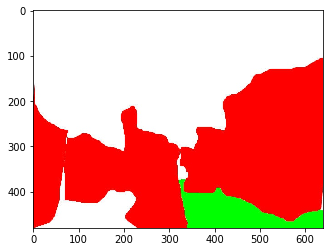

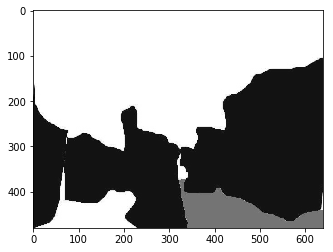

(480, 640)


In [69]:
train_labels_path = "/home/mcalvarez/Traversability_project/Segmentation_data/indoor_selected_img_n_labels/train_labels_RGB_orig" 
#Get image labels file names
all_names_train_labels = os.listdir(train_labels_path)
sort_nicely(all_names_train_labels)

#Show an example image 
filename =  all_names_train_labels[0]
print(filename)
filePath = os.path.join(train_labels_path, filename)
#Read image
im_l = cv2.imread(filePath)
#RGb_to_gray
gray = cv2.cvtColor(im_l, cv2.COLOR_BGR2GRAY) 

#Plotting
plt.imshow(im_l[:,:,::-1])
plt.show()

plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

print(gray.shape)

In [ ]:
save_label_path = "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train_labels_1ch" 

#Define constants
row,col = gray.shape
num_classes = 3
thr = 255.0/num_classes 

#Sweep image folder
for filename in all_names_train_labels:
    
    filePath = os.path.join(train_labels_path, filename)
    #Read image
    im_l = cv2.imread(filePath)
    #RGb_to_gray
    gray = cv2.cvtColor(im_l, cv2.COLOR_BGR2GRAY) 
    #Define new image
    new_img = np.zeros((row,col), np.uint8)
    
    #Sweep rows, cols
    for i in range(row):
        for j in range(col):
            current_color = gray[i,j]
            #Tree classes - default class: 0
            if(thr <  current_color <= thr*2):
                new_img[i,j] = 1
            elif(thr*2 <  current_color):
                new_img[i,j] = 2

    #Save Image
    cv2.imwrite( os.path.join(save_label_path, filename) , new_img)

plt.imshow(new_img)
plt.show()
                    

# Explicacion de colores:
    
0: obstaculos - Rojo -  225 13 0
1: camino - verde -  149 255 0
2: fondo - blanco - 255 255 255


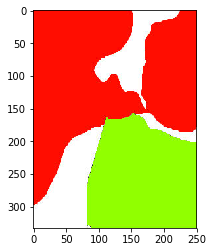

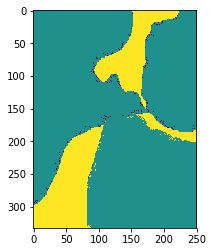

In [70]:
#normalizacion automática
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 
a_img = np.array(gray, np.double)

normalized = cv2.normalize(gray, a_img, 0.0,2.0, cv2.NORM_MINMAX) 
#No funciona la normalizacion como esperamos, ya que une la clase de objetos con el camino, creo q es porque 
#la imagen no tiene 3 colores sino que tiene algunos puntos de otro color oscuro que interfieren en la normalizacion
plt.imshow(im[:,:,::-1])
plt.show()
plt.imshow(normalized)
plt.show()
                 


# -------------------------------------------
# Resize images and labels


In [26]:
from os.path import expanduser

train_path = os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/imagesOct23') #imagesOct18
save_path = os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/imagesCV2Oct23') #imagesOct18

# #imagesOct18train_path = "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train"
#train_labels_path = "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train_labels_1ch" 


all_names_train = os.listdir(train_path)

sort_nicely(all_names_train) 

img_cols = 480
img_rows = 360


# Read cv2 images

In [ ]:
#Sweep image folder
for filename in all_names_train:
    
    filePath = os.path.join(train_path, filename)
    filePath_l = os.path.join(train_labels_path, filename)
    
    #Read image
    im = cv2.imread(filePath)
    im_l = cv2.imread(filePath_l)
    
    #resize
    resized = cv2.resize(im ,(img_cols, img_rows), interpolation =  cv2.INTER_CUBIC)
    resized_l = cv2.resize(im_l ,(img_cols, img_rows), interpolation =  cv2.INTER_CUBIC)
    
    #Save Image
    cv2.imwrite( os.path.join(train_path, filename) , resized)
    cv2.imwrite( os.path.join(train_labels_path, filename) , resized_l)
            

# Read np array images

(360, 480, 3)


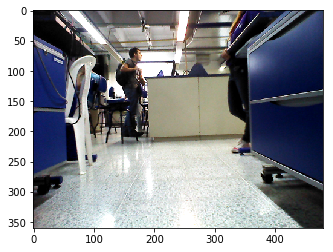

In [27]:
#Example image BEFORE:

fileName =  os.path.join(train_path, all_names_train[0])
image = np.load(fileName)
#print(image.shape)

print(image.shape)

#Show image
plt.imshow(image[:,:,::-1])
plt.show()

In [28]:
for filename in all_names_train:
    
    fileName =  os.path.join(train_path, all_names_train[0])
    image = np.load(fileName)
    
    #resize
    resized = cv2.resize(image ,(img_cols, img_rows), interpolation =  cv2.INTER_CUBIC)
    
    name = os.path.splitext(filename)[0] + ".jpg"
    #Save Image
    #np.save( os.path.join(train_path, filename), resized)
    cv2.imwrite( os.path.join(save_path, name) , resized)

In [29]:
all_names_train = os.listdir(save_path)

sort_nicely(all_names_train) 


(360, 480, 3)


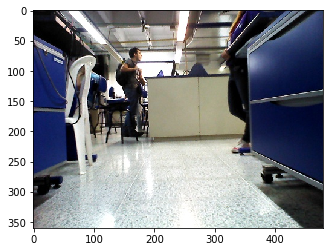

In [30]:
#Example image AFTER:

fileName =  os.path.join(save_path, all_names_train[0])
image = cv2.imread(fileName)
#print(image.shape)

print(image.shape)

#Show image
plt.imshow(image[:,:,::-1])
plt.show()

In [32]:
file = open("testfile.txt","w") 

for filename in all_names_train:
    #print ("/train_path/"+filename+" /train_labels_path/"+filename)
    #print ("/train_path/"+filename)
    file.write("imageVelDataset/imagesOct23/"+filename + "\n") 
    
file.close()

In [ ]:
# -------------------------------------------
# Show feature maps examples

(512, 12, 15)


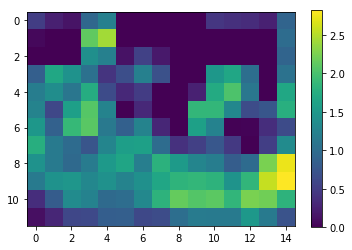

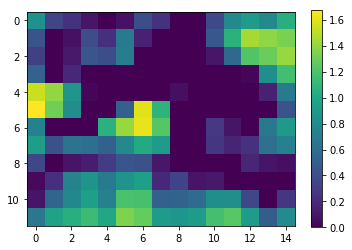

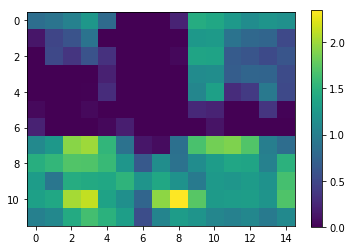

In [48]:
#Show feature map

maps_path = os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/featMapimagesOct18')

all_names_train = os.listdir(maps_path)

sort_nicely(all_names_train) 


fileName =  os.path.join(maps_path, all_names_train[0])
image = np.load(fileName)
#print(image.shape)

print(image.shape)

#Show image
plt.imshow(image[0,:,:]) ; plt.colorbar() ;  plt.show()
plt.imshow(image[1,:,:]); plt.colorbar() ;  plt.show()
plt.imshow(image[2,:,:]); plt.colorbar() ;  plt.show()


# -------------------------------------------
# Split data: train and test


In [ ]:
train_path =       "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train_orig"
train_labels_path = "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train_labels_1ch_orig" 

save_train_path =  "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train" 
save_label_path =  "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/train_labels_1ch" 


save_test_path =  "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/test" 
save_test_label_path =  "/home/mcalvarez/Traversability_project/bagfiles_and_images/bag_indoor_data/indoor_selected_img_n_labels/test_labels_1ch" 

all_names_train = os.listdir(train_path)

sort_nicely(all_names_train) 


test_percent = 20

# Option 1

In [ ]:
for filename in all_names_train:
    
    filePath = os.path.join(train_path, filename)
    filePath_l = os.path.join(train_labels_path, filename)
    
    #Read image
    im = cv2.imread(filePath)
    im_l = cv2.imread(filePath_l)
    
    if not(np.random.rand()  < 0.2):
        #train       
        #Save Image
        cv2.imwrite( os.path.join(save_train_path, filename) , im)
        cv2.imwrite( os.path.join(save_label_path, filename) , im_l)
            
    else:
        #test
        #Save Image
        cv2.imwrite( os.path.join(save_test_path, filename) , im)
        cv2.imwrite( os.path.join(save_test_label_path, filename) , im_l)    

# Option 2

In [ ]:
import random
import copy

cant_img = 100

imgs_test = int(test_percent*(100./cant_img))

rand_names = copy.copy(all_names_train)
random.shuffle(rand_names)

train = rand_names[imgs_test:]
test = rand_names[:imgs_test]

#..............

In [ ]:
all_names_train = os.listdir(save_train_path)

sort_nicely(all_names_train)
all_names_train

for filename in all_names_train:
    print ("/train_path/"+filename+" /train_labels_path/"+filename)

# -------------------------------------------
# Accuracy metric


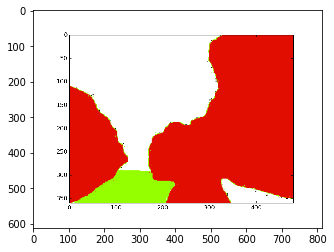

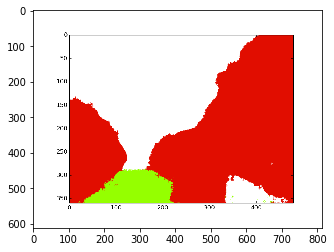

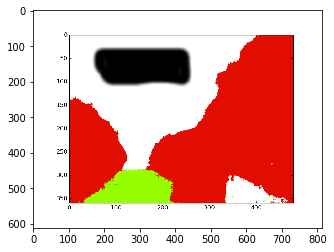

(612, 812, 3)

In [56]:
im_name1 = "figure_2.png"
im_name2 = "figure_3.png"
im_name3 = "figure_4.png"

im1 = cv2.imread(im_name1)
im2 = cv2.imread(im_name2)
im3 = cv2.imread(im_name3)

plt.imshow(im1[:,:,::-1])
plt.show()
plt.imshow(im2[:,:,::-1])
plt.show()
plt.imshow(im3[:,:,::-1])
plt.show()

im1.shape

In [57]:
diff = im1-im1

r,c,l = diff.shape

percent = 100.*(np.where(diff == 0)[0].shape[0])/(r*c*l)
print("percent 1 & 1: " , percent)


diff = im1-im2

percent = 100.*(np.where(diff == 0)[0].shape[0])/(r*c*l)
print("percent 1 & 2: " , percent)

diff = im1-im3

percent = 100.*(np.where(diff == 0)[0].shape[0])/(r*c*l)
print("percent 1 & 3: " , percent)

('percent 1 & 1: ', 100.0)
('percent 1 & 2: ', 95.20824613370252)
('percent 1 & 3: ', 88.9974859675671)


In [58]:
np.where((diff == 0) | (abs(diff)<1e-07))

(array([  0,   0,   0, ..., 611, 611, 611]),
 array([  0,   0,   0, ..., 811, 811, 811]),
 array([0, 1, 2, ..., 0, 1, 2]))

In [59]:
a = np.array([7.01231118e-09, -1.5, -0.2, 0.2, 1.5, 1.7, 2.0])
a = np.rint(a)

a

array([ 0., -2., -0.,  0.,  2.,  2.,  2.])

In [60]:
(im1&im2)

k = np.equal(im1,im3)



100.*(np.where(k == True)[0].shape[0])/(r*c*l)

88.9974859675671

In [61]:
from numpy import linalg as LA
a = np.arange(9) - 4
print(a)

b = a.reshape((3, 3))
print(b)




[-4 -3 -2 -1  0  1  2  3  4]
[[-4 -3 -2]
 [-1  0  1]
 [ 2  3  4]]


In [62]:
LA.norm(a)


7.745966692414834